# Assignment 8 : 
# Apply Naive Bayes on Donors Choose dataset

In [1]:
#make sure you are loading atleast 50k datapoints
#you can work with features of preprocessed_data.csv for the assignment.
import pandas
data = pandas.read_csv('preprocessed_data.csv')

## 1.1 Loading Data

In [2]:
y = data['project_is_approved'] 
X = data.drop(['project_is_approved'], axis=1)
print(X.iloc[0])

school_state                                                                                   ca
teacher_prefix                                                                                mrs
project_grade_category                                                              grades_prek_2
teacher_number_of_previously_posted_projects                                                   53
clean_categories                                                                     math_science
clean_subcategories                                            appliedsciences health_lifescience
essay                                           i fortunate enough use fairy tale stem kits cl...
price                                                                                      725.05
Name: 0, dtype: object


<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [3]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

# 2. Perform Bag of Words Vectorization of text data.

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=10, ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train['essay'].tolist())

# Transform the text into vectors using the fitted CountVectorizer
X_train_essay_bow = vectorizer.transform(X_train['essay'].tolist())
X_cv_essay_bow = vectorizer.transform(X_cv['essay'].tolist())
X_test_essay_bow = vectorizer.transform(X_test['essay'].tolist())

# Print the shapes of the arrays
print(f"After vectorizations:\n{X_train_essay_bow.shape}, {y_train.shape}\n{X_cv_essay_bow.shape}, {y_cv.shape}\n{X_test_essay_bow.shape}, {y_test.shape}\n{'='*100}")


After vectorizations:
(49041, 5000), (49041,)
(24155, 5000), (24155,)
(36052, 5000), (36052,)


# 3. Perform tfidf vectorization of text data.

> I am performing it in a later stage when i am making set 2

# 4. perform one-hot encoding of categorical features.

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

def vectorize_features(train, cv, test, feature):
    vectorizer = CountVectorizer(binary=True)
    vectorizer.fit(train[feature].values)
    train_ohe = vectorizer.transform(train[feature].values)
    cv_ohe = vectorizer.transform(cv[feature].values)
    test_ohe = vectorizer.transform(test[feature].values)
    print("After vectorizations")
    print(train_ohe.shape, y_train.shape)
    print(cv_ohe.shape, y_cv.shape)
    print(test_ohe.shape, y_test.shape)
    print(vectorizer.get_feature_names_out())
    print("="*100)
    return train_ohe, cv_ohe, test_ohe

# Vectorizing categorical data
X_train_state_ohe, X_cv_state_ohe, X_test_state_ohe = vectorize_features(X_train, X_cv, X_test, 'school_state')
X_train_teacher_ohe, X_cv_teacher_ohe, X_test_teacher_ohe = vectorize_features(X_train, X_cv, X_test, 'teacher_prefix')
X_train_grade_ohe, X_cv_grade_ohe, X_test_grade_ohe = vectorize_features(X_train, X_cv, X_test, 'project_grade_category')

After vectorizations
(49041, 51) (49041,)
(24155, 51) (24155,)
(36052, 51) (36052,)
['ak' 'al' 'ar' 'az' 'ca' 'co' 'ct' 'dc' 'de' 'fl' 'ga' 'hi' 'ia' 'id'
 'il' 'in' 'ks' 'ky' 'la' 'ma' 'md' 'me' 'mi' 'mn' 'mo' 'ms' 'mt' 'nc'
 'nd' 'ne' 'nh' 'nj' 'nm' 'nv' 'ny' 'oh' 'ok' 'or' 'pa' 'ri' 'sc' 'sd'
 'tn' 'tx' 'ut' 'va' 'vt' 'wa' 'wi' 'wv' 'wy']
After vectorizations
(49041, 5) (49041,)
(24155, 5) (24155,)
(36052, 5) (36052,)
['dr' 'mr' 'mrs' 'ms' 'teacher']
After vectorizations
(49041, 4) (49041,)
(24155, 4) (24155,)
(36052, 4) (36052,)
['grades_3_5' 'grades_6_8' 'grades_9_12' 'grades_prek_2']


># OHE for clean categories and clean subcategories

In [6]:
from collections import Counter

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter(data['clean_categories'].str.split().sum())                                    
    
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
sorted_cat_dict = dict(sorted(my_counter.items(), key=lambda kv: kv[1]))
vectorizer_cl_cat = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer_cl_cat.fit(X_train['clean_categories'])
X_train_cl_categories_ohe = vectorizer_cl_cat.transform(X_train['clean_categories'])
X_cv_cl_categories_ohe = vectorizer_cl_cat.transform(X_cv['clean_categories'])
X_test_cl_categories_ohe = vectorizer_cl_cat.transform(X_test['clean_categories'])
print("After vectorizations")
print(X_train_cl_categories_ohe.shape, y_train.shape)
print(X_cv_cl_categories_ohe.shape, y_cv.shape)
print(X_test_cl_categories_ohe.shape, y_test.shape)
print(vectorizer_cl_cat.get_feature_names_out())
print("="*100)

After vectorizations
(49041, 9) (49041,)
(24155, 9) (24155,)
(36052, 9) (36052,)
['warmth' 'care_hunger' 'history_civics' 'music_arts' 'appliedlearning'
 'specialneeds' 'health_sports' 'math_science' 'literacy_language']


In [7]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter(data['clean_subcategories'].str.split().sum())
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
sorted_cat_dict = dict(sorted(my_counter.items(), key=lambda kv: kv[1]))
vectorizer_cl_subcat = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer_cl_subcat.fit(X_train['clean_subcategories'])
X_train_cl_subcategories_ohe = vectorizer_cl_subcat.transform(X_train['clean_subcategories'])
X_cv_cl_subcategories_ohe = vectorizer_cl_subcat.transform(X_cv['clean_subcategories'])
X_test_cl_subcategories_ohe = vectorizer_cl_subcat.transform(X_test['clean_subcategories'])
print("After vectorizations")
print(X_train_cl_subcategories_ohe.shape, y_train.shape)
print(X_cv_cl_subcategories_ohe.shape, y_cv.shape)
print(X_test_cl_subcategories_ohe.shape, y_test.shape)
print(vectorizer_cl_subcat.get_feature_names_out())
print("="*100)

After vectorizations
(49041, 30) (49041,)
(24155, 30) (24155,)
(36052, 30) (36052,)
['economics' 'communityservice' 'financialliteracy' 'parentinvolvement'
 'extracurricular' 'civics_government' 'foreignlanguages'
 'nutritioneducation' 'warmth' 'care_hunger' 'socialsciences'
 'performingarts' 'charactereducation' 'teamsports' 'other'
 'college_careerprep' 'music' 'history_geography' 'health_lifescience'
 'earlydevelopment' 'esl' 'gym_fitness' 'environmentalscience'
 'visualarts' 'health_wellness' 'appliedsciences' 'specialneeds'
 'literature_writing' 'mathematics' 'literacy']


# 5. perform normalization of numerical features

In [8]:
from sklearn.preprocessing import Normalizer

# Normalize price column
normalizer_price = Normalizer()
normalizer_price.fit(X_train['price'].values.reshape(-1,1))
X_train_price_norm = normalizer_price.transform(X_train['price'].values.reshape(-1,1))
X_cv_price_norm = normalizer_price.transform(X_cv['price'].values.reshape(-1,1))
X_test_price_norm = normalizer_price.transform(X_test['price'].values.reshape(-1,1))

# Normalize teacher_number_of_previously_posted_projects column
normalizer_prev_projects = Normalizer()
normalizer_prev_projects.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_train_prev_projects_norm = normalizer_prev_projects.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_cv_prev_projects_norm = normalizer_prev_projects.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_prev_projects_norm = normalizer_prev_projects.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

# Print shapes of normalized features
print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)
print(X_train_prev_projects_norm.shape, y_train.shape)
print(X_cv_prev_projects_norm.shape, y_cv.shape)
print(X_test_prev_projects_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


# 6. For set 1 stack up all the features using hstack()

In [9]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((X_train_essay_bow, X_train_cl_categories_ohe, X_train_cl_subcategories_ohe, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_prev_projects_norm, X_train_price_norm)).tocsr()
X_cr = hstack((X_cv_essay_bow, X_cv_cl_categories_ohe, X_cv_cl_subcategories_ohe, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_prev_projects_norm, X_cv_price_norm)).tocsr()
X_te = hstack((X_test_essay_bow, X_test_cl_categories_ohe, X_test_cl_subcategories_ohe, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_prev_projects_norm, X_test_price_norm)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(49041, 5101) (49041,)
(24155, 5101) (24155,)
(36052, 5101) (36052,)


# Applying NB on different kind of featurization as mentioned in the instructions for set 1

In [10]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider your X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

# 8. Perform hyperparameter tuning and represent the training and cross-validation AUC scores for different 'alpha' values, using a 2D line plot.

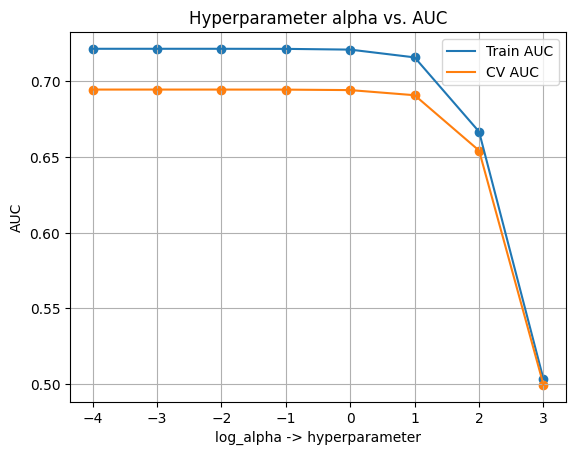

In [11]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
import math

train_auc = []
cv_auc = []
log_alpha_vals = []
alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

for i in alpha:
    mnb_bow = MultinomialNB(alpha=i, class_prior=[0.5, 0.5])
    mnb_bow.fit(X_tr, y_train)

    y_train_pred = batch_predict(mnb_bow, X_tr)    
    y_cv_pred = batch_predict(mnb_bow, X_cr)
           
    train_auc.append(roc_auc_score(y_train, y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    
    log_alpha_vals.append(math.log10(i))

plt.plot(log_alpha_vals, train_auc, label='Train AUC')
plt.plot(log_alpha_vals, cv_auc, label='CV AUC')
plt.scatter(log_alpha_vals, train_auc)
plt.scatter(log_alpha_vals, cv_auc)
plt.legend()
plt.xlabel("log_alpha -> hyperparameter")
plt.ylabel("AUC")
plt.title("Hyperparameter alpha vs. AUC")
plt.grid()
plt.show()

In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score

mnb_bow = MultinomialNB(class_prior=[0.5, 0.5])
parameters = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
clf = GridSearchCV(mnb_bow, parameters, cv=3, scoring='roc_auc', return_train_score=True, verbose=3)
clf.fit(X_tr, y_train)

train_auc = clf.cv_results_['mean_train_score']
train_auc_std = clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std = clf.cv_results_['std_test_score']

best_alpha_1 = clf.best_params_['alpha']
best_alpha_score_1 = clf.best_score_

print("Best_Alpha_value_is: ",best_alpha_1,"\nBest_Score_is: ",best_alpha_score_1)
print("="*100)

results = pd.DataFrame.from_dict(clf.cv_results_)
result_values = results.sort_values(['param_alpha'])
results.head()

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3] END ..alpha=0.0001;, score=(train=0.734, test=0.690) total time=   0.0s
[CV 2/3] END ..alpha=0.0001;, score=(train=0.739, test=0.686) total time=   0.0s
[CV 3/3] END ..alpha=0.0001;, score=(train=0.732, test=0.686) total time=   0.0s
[CV 1/3] END ...alpha=0.001;, score=(train=0.734, test=0.690) total time=   0.0s
[CV 2/3] END ...alpha=0.001;, score=(train=0.739, test=0.686) total time=   0.0s
[CV 3/3] END ...alpha=0.001;, score=(train=0.732, test=0.686) total time=   0.0s
[CV 1/3] END ....alpha=0.01;, score=(train=0.734, test=0.690) total time=   0.0s
[CV 2/3] END ....alpha=0.01;, score=(train=0.739, test=0.686) total time=   0.0s
[CV 3/3] END ....alpha=0.01;, score=(train=0.732, test=0.686) total time=   0.0s
[CV 1/3] END .....alpha=0.1;, score=(train=0.734, test=0.690) total time=   0.0s
[CV 2/3] END .....alpha=0.1;, score=(train=0.739, test=0.686) total time=   0.0s
[CV 3/3] END .....alpha=0.1;, score=(train=0.732,

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.062767,0.000384,0.021589,0.006890,0.0001,{'alpha': 0.0001},0.690490,0.686384,0.686064,0.687646,0.002015,1,0.734409,0.739033,0.732369,0.735270,0.002788
1,0.075436,0.002578,0.015634,0.000035,0.001,{'alpha': 0.001},0.690490,0.686383,0.686064,0.687646,0.002016,2,0.734408,0.739033,0.732368,0.735270,0.002788
2,0.072971,0.003708,0.015158,0.000608,0.01,{'alpha': 0.01},0.690484,0.686378,0.686059,0.687640,0.002015,3,0.734399,0.739023,0.732360,0.735261,0.002787
3,0.064977,0.003441,0.015645,0.000101,0.1,{'alpha': 0.1},0.690437,0.686328,0.686002,0.687589,0.002019,4,0.734311,0.738932,0.732284,0.735175,0.002782
4,0.064915,0.003054,0.013356,0.010104,1,{'alpha': 1},0.689923,0.685861,0.685484,0.687089,0.002010,5,0.733421,0.738048,0.731509,0.734326,0.002745


log alpha values are taken into account as follows, 
log_alphaa: [-4. -3. -2. -1.  0.  1.  2.  3.]


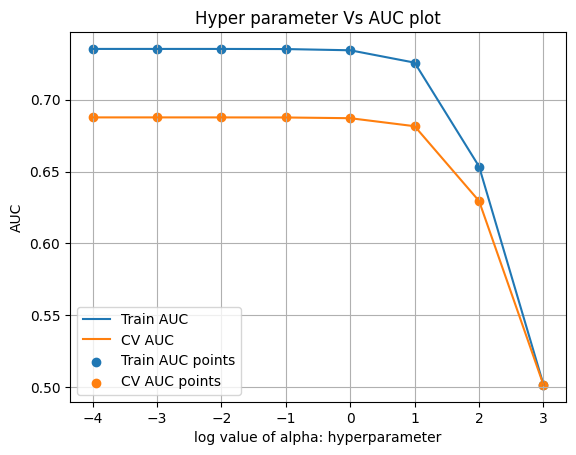

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

# define alpha values to be tested
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

# convert alpha values to log scale
log_alphas = np.log10(alphas)

print("log alpha values are taken into account as follows, \nlog_alphaa:", log_alphas)

# plot the results
plt.plot(log_alphas, train_auc, label='Train AUC')
plt.plot(log_alphas, cv_auc, label='CV AUC')
plt.scatter(log_alphas, train_auc, label='Train AUC points')
plt.scatter(log_alphas, cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("log value of alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()


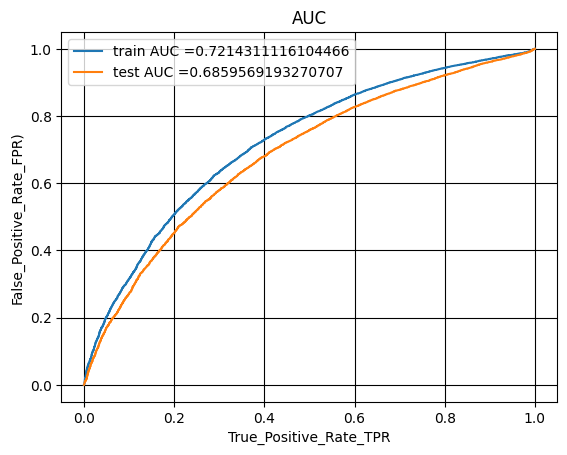

In [14]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

mnb_bow = MultinomialNB(alpha = best_alpha_1,class_prior=[0.5,0.5])
mnb_bow.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

#Training the classifier on the training data and predict the probabilities of positive class for both training and testing data.
y_train_pred = batch_predict(mnb_bow, X_tr)    
y_test_pred = batch_predict(mnb_bow, X_te)

# Computing the False Positive Rate (FPR), True Positive Rate (TPR), and thresholds for both training and testing data.
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

# Ploting the ROC curve for both training and testing data along with their respective AUC scores.
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True_Positive_Rate_TPR")
plt.ylabel("False_Positive_Rate_FPR)")
plt.title("AUC")
plt.grid(color='black', linewidth=0.8)
plt.show()

In [15]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
import numpy as np
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [16]:
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
df_confusion_matrix_train = confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))
print("="*100)
print("Train confusion matrix")
print(df_confusion_matrix_train)
print("="*100)
df_confusion_matrix_test = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))
print("Test confusion matrix")
print(df_confusion_matrix_test)

the maximum value of tpr*(1-fpr) 0.44559048533944545 for threshold 0.569
Train confusion matrix
[[ 4995  2431]
 [14047 27568]]
Test confusion matrix
[[ 3414  2045]
 [10516 20077]]


# 10. Plot confusion matrix based on the best threshold value

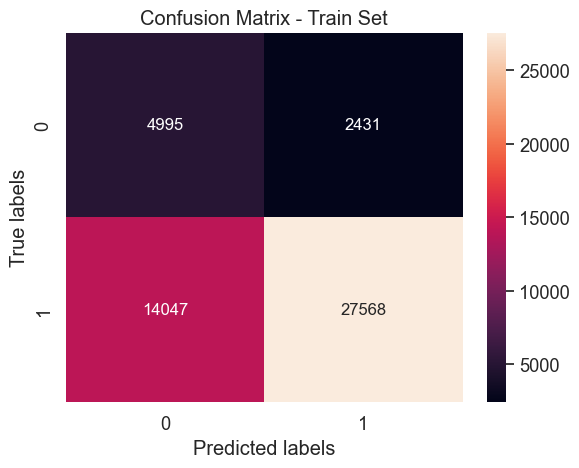

In [17]:
import seaborn as sns

# Set font scale and annotation size
sns.set(font_scale=1.2)
annot_kws = {"size": 12}

# Plot confusion matrix
sns.heatmap(df_confusion_matrix_train, annot=True, annot_kws=annot_kws, fmt='g')

# Set axis labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Train Set')
plt.show()

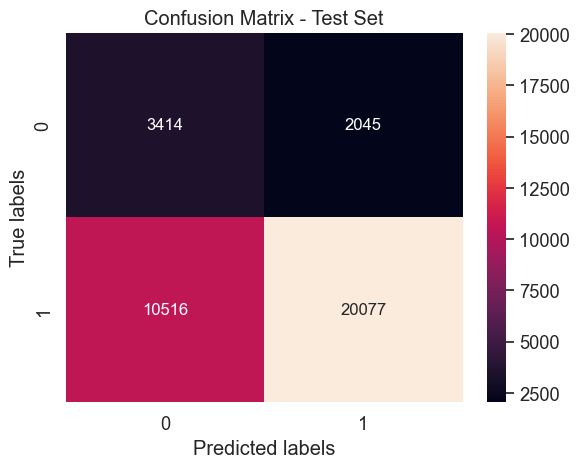

In [18]:
import seaborn as sns

# Set font scale and annotation size
sns.set(font_scale=1.2)
annot_kws = {"size": 12}

# Plot confusion matrix
sns.heatmap(df_confusion_matrix_test, annot=True, annot_kws=annot_kws, fmt='g')

# Set axis labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Test Set')
plt.show()

# Applying NB on different kind of featurization as mentioned in the instructions for set 2

> As mentioned above, I am performing: 

# 3. Perform tfidf vectorization of text data in an above step

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=10, ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train['essay'].tolist())

# Transform the text into vectors using the fitted CountVectorizer
X_train_essay_tfidf = vectorizer.transform(X_train['essay'].tolist())
X_cv_essay_tfidf = vectorizer.transform(X_cv['essay'].tolist())
X_test_essay_tfidf = vectorizer.transform(X_test['essay'].tolist())

# Print the shapes of the arrays
print(f"After vectorizations:\n{X_train_essay_tfidf.shape}, {y_train.shape}\n{X_cv_essay_tfidf.shape}, {y_cv.shape}\n{X_test_essay_tfidf.shape}, {y_test.shape}\n{'='*100}")


After vectorizations:
(49041, 5000), (49041,)
(24155, 5000), (24155,)
(36052, 5000), (36052,)


# 4. perform one-hot encoding of categorical features.

In [20]:
def vectorize_features_tfidf(train, cv, test, feature):
    vectorizer = TfidfVectorizer(binary=True)
    vectorizer.fit(train[feature].values)
    train_ohe = vectorizer.transform(train[feature].values)
    cv_ohe = vectorizer.transform(cv[feature].values)
    test_ohe = vectorizer.transform(test[feature].values)
    feature_names = vectorizer.get_feature_names_out()
    print("After vectorizations")
    print(train_ohe.shape, y_train.shape)
    print(cv_ohe.shape, y_cv.shape)
    print(test_ohe.shape, y_test.shape)
    print(feature_names)
    print("="*100)
    return train_ohe, cv_ohe, test_ohe, feature_names

X_train_state_ohe_tfidf, X_cv_state_ohe_tfidf, X_test_state_ohe_tfidf, state_feature_names = vectorize_features_tfidf(X_train, X_cv, X_test, 'school_state')
X_train_teacher_ohe_tfidf, X_cv_teacher_ohe_tfidf, X_test_teacher_ohe_tfidf, teacher_feature_names = vectorize_features_tfidf(X_train, X_cv, X_test, 'teacher_prefix')
X_train_grade_ohe_tfidf, X_cv_grade_ohe_tfidf, X_test_grade_ohe_tfidf, grade_feature_names = vectorize_features_tfidf(X_train, X_cv, X_test, 'project_grade_category')

After vectorizations
(49041, 51) (49041,)
(24155, 51) (24155,)
(36052, 51) (36052,)
['ak' 'al' 'ar' 'az' 'ca' 'co' 'ct' 'dc' 'de' 'fl' 'ga' 'hi' 'ia' 'id'
 'il' 'in' 'ks' 'ky' 'la' 'ma' 'md' 'me' 'mi' 'mn' 'mo' 'ms' 'mt' 'nc'
 'nd' 'ne' 'nh' 'nj' 'nm' 'nv' 'ny' 'oh' 'ok' 'or' 'pa' 'ri' 'sc' 'sd'
 'tn' 'tx' 'ut' 'va' 'vt' 'wa' 'wi' 'wv' 'wy']
After vectorizations
(49041, 5) (49041,)
(24155, 5) (24155,)
(36052, 5) (36052,)
['dr' 'mr' 'mrs' 'ms' 'teacher']
After vectorizations
(49041, 4) (49041,)
(24155, 4) (24155,)
(36052, 4) (36052,)
['grades_3_5' 'grades_6_8' 'grades_9_12' 'grades_prek_2']


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

def vectorize_features_tfidf(train, cv, test, feature):
    vectorizer = TfidfVectorizer(binary=True)
    vectorizer.fit(train[feature].values)
    train_ohe = vectorizer.transform(train[feature].values)
    cv_ohe = vectorizer.transform(cv[feature].values)
    test_ohe = vectorizer.transform(test[feature].values)
    print("After vectorizations")
    print(train_ohe.shape, y_train.shape)
    print(cv_ohe.shape, y_cv.shape)
    print(test_ohe.shape, y_test.shape)
    print(vectorizer.get_feature_names_out())
    print("="*100)
    return train_ohe, cv_ohe, test_ohe

# Vectorizing categorical data
X_train_state_ohe_tfidf, X_cv_state_ohe_tfidf, X_test_state_ohe_tfidf = vectorize_features_tfidf(X_train, X_cv, X_test, 'school_state')
X_train_teacher_ohe_tfidf, X_cv_teacher_ohe_tfidf, X_test_teacher_ohe_tfidf = vectorize_features_tfidf(X_train, X_cv, X_test, 'teacher_prefix')
X_train_grade_ohe_tfidf, X_cv_grade_ohe_tfidf, X_test_grade_ohe_tfidf = vectorize_features_tfidf(X_train, X_cv, X_test, 'project_grade_category')

After vectorizations
(49041, 51) (49041,)
(24155, 51) (24155,)
(36052, 51) (36052,)
['ak' 'al' 'ar' 'az' 'ca' 'co' 'ct' 'dc' 'de' 'fl' 'ga' 'hi' 'ia' 'id'
 'il' 'in' 'ks' 'ky' 'la' 'ma' 'md' 'me' 'mi' 'mn' 'mo' 'ms' 'mt' 'nc'
 'nd' 'ne' 'nh' 'nj' 'nm' 'nv' 'ny' 'oh' 'ok' 'or' 'pa' 'ri' 'sc' 'sd'
 'tn' 'tx' 'ut' 'va' 'vt' 'wa' 'wi' 'wv' 'wy']
After vectorizations
(49041, 5) (49041,)
(24155, 5) (24155,)
(36052, 5) (36052,)
['dr' 'mr' 'mrs' 'ms' 'teacher']
After vectorizations
(49041, 4) (49041,)
(24155, 4) (24155,)
(36052, 4) (36052,)
['grades_3_5' 'grades_6_8' 'grades_9_12' 'grades_prek_2']


># OHE for clean categories and clean subcategories

In [22]:
from collections import Counter

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter(data['clean_categories'].str.split().sum())                                    
    
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
sorted_cat_dict = dict(sorted(my_counter.items(), key=lambda kv: kv[1]))
vectorizer_cl_cat_tfidf = TfidfVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer_cl_cat_tfidf.fit(X_train['clean_categories'])
X_train_cl_categories_ohe_tfidf = vectorizer_cl_cat_tfidf.transform(X_train['clean_categories'])
X_cv_cl_categories_ohe_tfidf = vectorizer_cl_cat_tfidf.transform(X_cv['clean_categories'])
X_test_cl_categories_ohe_tfidf = vectorizer_cl_cat_tfidf.transform(X_test['clean_categories'])
print("After vectorizations")
print(X_train_cl_categories_ohe_tfidf.shape, y_train.shape)
print(X_cv_cl_categories_ohe_tfidf.shape, y_cv.shape)
print(X_test_cl_categories_ohe_tfidf.shape, y_test.shape)
print(vectorizer_cl_cat_tfidf.get_feature_names_out())
print("="*100)

After vectorizations
(49041, 9) (49041,)
(24155, 9) (24155,)
(36052, 9) (36052,)
['warmth' 'care_hunger' 'history_civics' 'music_arts' 'appliedlearning'
 'specialneeds' 'health_sports' 'math_science' 'literacy_language']


In [23]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter(data['clean_subcategories'].str.split().sum())
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
sorted_cat_dict = dict(sorted(my_counter.items(), key=lambda kv: kv[1]))
vectorizer_cl_subcat_tfidf = TfidfVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer_cl_subcat_tfidf.fit(X_train['clean_subcategories'])
X_train_cl_subcategories_ohe_tfidf = vectorizer_cl_subcat_tfidf.transform(X_train['clean_subcategories'])
X_cv_cl_subcategories_ohe_tfidf = vectorizer_cl_subcat_tfidf.transform(X_cv['clean_subcategories'])
X_test_cl_subcategories_ohe_tfidf = vectorizer_cl_subcat_tfidf.transform(X_test['clean_subcategories'])
print("After vectorizations")
print(X_train_cl_subcategories_ohe_tfidf.shape, y_train.shape)
print(X_cv_cl_subcategories_ohe_tfidf.shape, y_cv.shape)
print(X_test_cl_subcategories_ohe_tfidf.shape, y_test.shape)
print(vectorizer_cl_subcat_tfidf.get_feature_names_out())
print("="*100)

After vectorizations
(49041, 30) (49041,)
(24155, 30) (24155,)
(36052, 30) (36052,)
['economics' 'communityservice' 'financialliteracy' 'parentinvolvement'
 'extracurricular' 'civics_government' 'foreignlanguages'
 'nutritioneducation' 'warmth' 'care_hunger' 'socialsciences'
 'performingarts' 'charactereducation' 'teamsports' 'other'
 'college_careerprep' 'music' 'history_geography' 'health_lifescience'
 'earlydevelopment' 'esl' 'gym_fitness' 'environmentalscience'
 'visualarts' 'health_wellness' 'appliedsciences' 'specialneeds'
 'literature_writing' 'mathematics' 'literacy']


# 6. For set 2 stack up all the features using hstack()

In [24]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr_tfidf = hstack((X_train_essay_tfidf, X_train_cl_categories_ohe_tfidf, X_train_cl_subcategories_ohe_tfidf, X_train_state_ohe_tfidf, X_train_teacher_ohe_tfidf, X_train_grade_ohe_tfidf, X_train_prev_projects_norm, X_train_price_norm)).tocsr()
X_cr_tfidf = hstack((X_cv_essay_tfidf, X_cv_cl_categories_ohe_tfidf, X_cv_cl_subcategories_ohe_tfidf, X_cv_state_ohe_tfidf, X_cv_teacher_ohe_tfidf, X_cv_grade_ohe_tfidf, X_cv_prev_projects_norm, X_cv_price_norm)).tocsr()
X_te_tfidf = hstack((X_test_essay_tfidf, X_test_cl_categories_ohe_tfidf, X_test_cl_subcategories_ohe_tfidf, X_test_state_ohe_tfidf, X_test_teacher_ohe_tfidf, X_test_grade_ohe_tfidf, X_test_prev_projects_norm, X_test_price_norm)).tocsr()

print("Final Data matrix")
print(X_tr_tfidf.shape, y_train.shape)
print(X_cr_tfidf.shape, y_cv.shape)
print(X_te_tfidf.shape, y_test.shape)
print("="*100)

Final Data matrix
(49041, 5101) (49041,)
(24155, 5101) (24155,)
(36052, 5101) (36052,)


# Applying NB on different kind of featurization as mentioned in the instructions for set 2

In [25]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider your X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

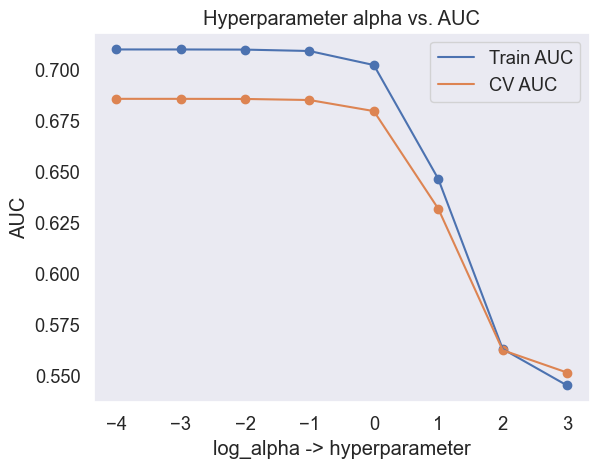

In [26]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
import math

train_auc_tfidf = []
cv_auc_tfidf = []
log_alpha_vals_tfidf = []
alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

for i in alpha:
    mnb_tfidf = MultinomialNB(alpha=i, class_prior=[0.5, 0.5])
    mnb_tfidf.fit(X_tr_tfidf, y_train)

    y_train_pred_tfidf = batch_predict(mnb_tfidf, X_tr_tfidf)    
    y_cv_pred_tfidf = batch_predict(mnb_tfidf, X_cr_tfidf)
           
    train_auc_tfidf.append(roc_auc_score(y_train, y_train_pred_tfidf))
    cv_auc_tfidf.append(roc_auc_score(y_cv, y_cv_pred_tfidf))
    
    log_alpha_vals_tfidf.append(math.log10(i))

plt.plot(log_alpha_vals_tfidf, train_auc_tfidf, label='Train AUC')
plt.plot(log_alpha_vals_tfidf, cv_auc_tfidf, label='CV AUC')
plt.scatter(log_alpha_vals_tfidf, train_auc_tfidf)
plt.scatter(log_alpha_vals_tfidf, cv_auc_tfidf)
plt.legend()
plt.xlabel("log_alpha -> hyperparameter")
plt.ylabel("AUC")
plt.title("Hyperparameter alpha vs. AUC")
plt.grid()
plt.show()

In [27]:
mnb_tfidf = MultinomialNB(class_prior=[0.5, 0.5])
parameters = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
clf_tfidf = GridSearchCV(mnb_tfidf, parameters, cv=3, scoring='roc_auc', return_train_score=True, verbose=3)
clf_tfidf.fit(X_tr, y_train)

train_auc_tfidf = clf_tfidf.cv_results_['mean_train_score']
train_auc_tfidf_std = clf_tfidf.cv_results_['std_train_score']
cv_auc_tfidf = clf_tfidf.cv_results_['mean_test_score'] 
cv_auc_tfidf_std = clf_tfidf.cv_results_['std_test_score']

best_alpha_2 = clf_tfidf.best_params_['alpha']
best_alpha_score_2 = clf_tfidf.best_score_

print("Best_Alpha_value_is: ",best_alpha_2,"\nBest_Score_is: ",best_alpha_score_2)
print("="*100)

results_tfidf = pd.DataFrame.from_dict(clf_tfidf.cv_results_)
result_values_tfidf = results_tfidf.sort_values(['param_alpha'])
results_tfidf.head()

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3] END ..alpha=0.0001;, score=(train=0.734, test=0.690) total time=   0.0s
[CV 2/3] END ..alpha=0.0001;, score=(train=0.739, test=0.686) total time=   0.0s
[CV 3/3] END ..alpha=0.0001;, score=(train=0.732, test=0.686) total time=   0.0s
[CV 1/3] END ...alpha=0.001;, score=(train=0.734, test=0.690) total time=   0.0s
[CV 2/3] END ...alpha=0.001;, score=(train=0.739, test=0.686) total time=   0.0s
[CV 3/3] END ...alpha=0.001;, score=(train=0.732, test=0.686) total time=   0.0s
[CV 1/3] END ....alpha=0.01;, score=(train=0.734, test=0.690) total time=   0.0s
[CV 2/3] END ....alpha=0.01;, score=(train=0.739, test=0.686) total time=   0.0s
[CV 3/3] END ....alpha=0.01;, score=(train=0.732, test=0.686) total time=   0.0s
[CV 1/3] END .....alpha=0.1;, score=(train=0.734, test=0.690) total time=   0.0s
[CV 2/3] END .....alpha=0.1;, score=(train=0.739, test=0.686) total time=   0.0s
[CV 3/3] END .....alpha=0.1;, score=(train=0.732,

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.073895,0.001467,0.017993,0.000822,0.0001,{'alpha': 0.0001},0.690490,0.686384,0.686064,0.687646,0.002015,1,0.734409,0.739033,0.732369,0.735270,0.002788
1,0.072158,0.002946,0.020994,0.000817,0.001,{'alpha': 0.001},0.690490,0.686383,0.686064,0.687646,0.002016,2,0.734408,0.739033,0.732368,0.735270,0.002788
2,0.079835,0.001959,0.020275,0.000450,0.01,{'alpha': 0.01},0.690484,0.686378,0.686059,0.687640,0.002015,3,0.734399,0.739023,0.732360,0.735261,0.002787
3,0.073319,0.005865,0.025417,0.008366,0.1,{'alpha': 0.1},0.690437,0.686328,0.686002,0.687589,0.002019,4,0.734311,0.738932,0.732284,0.735175,0.002782
4,0.073464,0.003278,0.022334,0.001699,1,{'alpha': 1},0.689923,0.685861,0.685484,0.687089,0.002010,5,0.733421,0.738048,0.731509,0.734326,0.002745


log alpha values are taken into account as follows, 
log_alphaa: [-4. -3. -2. -1.  0.  1.  2.  3.]


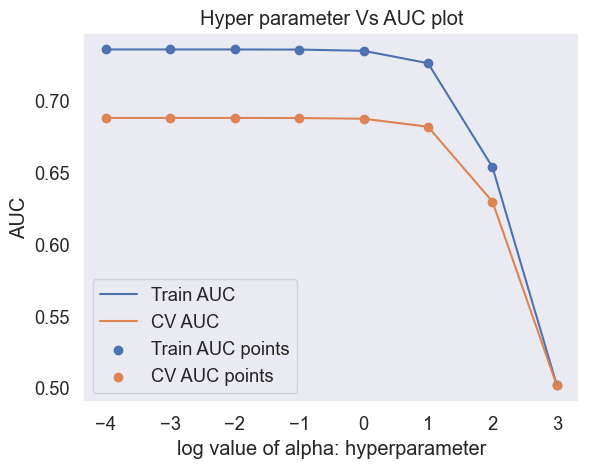

In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

# define alpha values to be tested
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

# convert alpha values to log scale
log_alphas = np.log10(alphas)

print("log alpha values are taken into account as follows, \nlog_alphaa:", log_alphas)

# plot the results
plt.plot(log_alphas, train_auc_tfidf, label='Train AUC')
plt.plot(log_alphas, cv_auc_tfidf, label='CV AUC')
plt.scatter(log_alphas, train_auc_tfidf, label='Train AUC points')
plt.scatter(log_alphas, cv_auc_tfidf, label='CV AUC points')
plt.legend()
plt.xlabel("log value of alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()


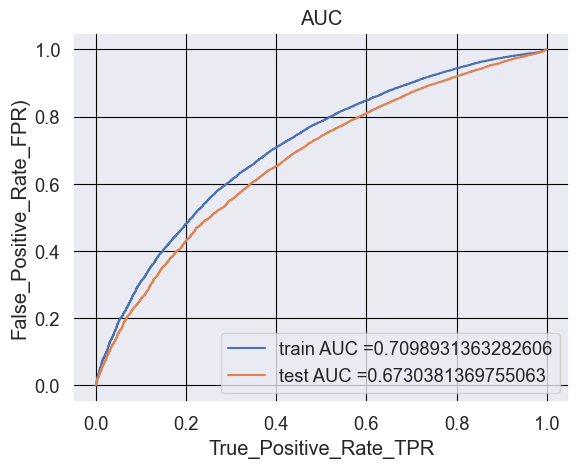

In [29]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

mnb_tfidf = MultinomialNB(alpha = best_alpha_2,class_prior=[0.5,0.5])
mnb_tfidf.fit(X_tr_tfidf, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

#Training the classifier on the training data and predict the probabilities of positive class for both training and testing data.
y_train_pred_tfidf = batch_predict(mnb_tfidf, X_tr_tfidf)    
y_test_pred_tfidf = batch_predict(mnb_tfidf, X_te_tfidf)

# Computing the False Positive Rate (FPR), True Positive Rate (TPR), and thresholds for both training and testing data.
train_fpr_tfidf, train_tpr_tfidf, tr_thresholds_tfidf = roc_curve(y_train, y_train_pred_tfidf)
test_fpr_tfidf, test_tpr_tfidf, te_thresholds_tfidf = roc_curve(y_test, y_test_pred_tfidf)

# Ploting the ROC curve for both training and testing data along with their respective AUC scores.
plt.plot(train_fpr_tfidf, train_tpr_tfidf, label="train AUC ="+str(auc(train_fpr_tfidf, train_tpr_tfidf)))
plt.plot(test_fpr_tfidf, test_tpr_tfidf, label="test AUC ="+str(auc(test_fpr_tfidf, test_tpr_tfidf)))
plt.legend()
plt.xlabel("True_Positive_Rate_TPR")
plt.ylabel("False_Positive_Rate_FPR)")
plt.title("AUC")
plt.grid(color='black', linewidth=0.8)
plt.show()

# 10. Plot confusion matrix based on the best threshold value

In [30]:
from sklearn.metrics import confusion_matrix
best_t_tfidf = find_best_threshold(tr_thresholds_tfidf, train_fpr_tfidf, train_tpr_tfidf)
df_confusion_matrix_train_tfidf = confusion_matrix(y_train, predict_with_best_t(y_train_pred_tfidf, best_t_tfidf))
print("="*100)
print("Train confusion matrix")
print(df_confusion_matrix_train_tfidf)
print("="*100)
df_confusion_matrix_test_tfidf = confusion_matrix(y_test, predict_with_best_t(y_test_pred_tfidf, best_t_tfidf))
print("Test confusion matrix")
print(df_confusion_matrix_test_tfidf)

the maximum value of tpr*(1-fpr) 0.4303095633899798 for threshold 0.51
Train confusion matrix
[[ 5013  2413]
 [15088 26527]]
Test confusion matrix
[[ 3420  2039]
 [11315 19278]]


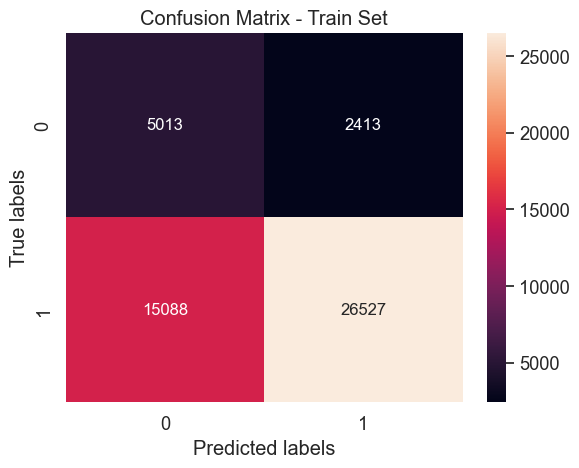

In [31]:
import seaborn as sns

# Set font scale and annotation size
sns.set(font_scale=1.2)
annot_kws = {"size": 12}

# Plot confusion matrix
sns.heatmap(df_confusion_matrix_train_tfidf, annot=True, annot_kws=annot_kws, fmt='g')

# Set axis labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Train Set')
plt.show()

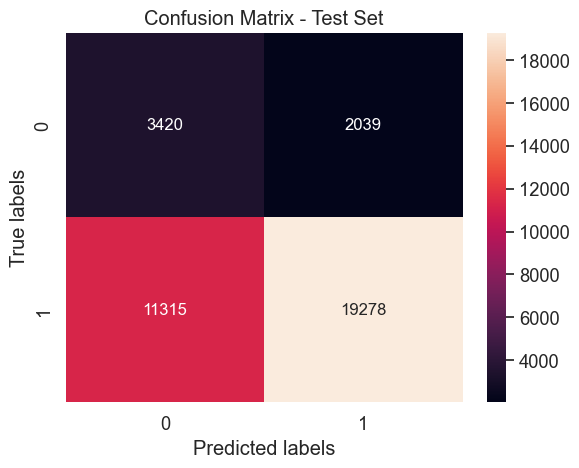

In [32]:
import seaborn as sns

# Set font scale and annotation size
sns.set(font_scale=1.2)
annot_kws = {"size": 12}

# Plot confusion matrix
sns.heatmap(df_confusion_matrix_test_tfidf, annot=True, annot_kws=annot_kws, fmt='g')

# Set axis labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Test Set')
plt.show()

Here, confusion matrix heatmap shows that the model is performing well at predicting true positives and true negatives, but is struggling with false negatives. 

In [33]:
# Either from set 1 (or) set 2, print the names of the top 20 features associated with the positive and negative classes each. (You have to print the names of the features, but not the indexes)


features_tfidf = []
# append all the feature names to the features_tfidf list
features_tfidf.extend(vectorizer_cl_cat_tfidf.get_feature_names_out())
features_tfidf.extend(vectorizer_cl_subcat_tfidf.get_feature_names_out())
features_tfidf.extend(state_feature_names)
features_tfidf.extend(teacher_feature_names)
features_tfidf.extend(grade_feature_names)
features_tfidf.extend(vectorizer.get_feature_names_out())
features_tfidf.append("price")
features_tfidf.append("prev_proposed_projects")

mnb_tfidf = MultinomialNB(alpha=0.5, class_prior=[0.5,0.5])
mnb_tfidf.fit(X_tr_tfidf, y_train)

# get the top 10 negative and positive class features
features_prob_negative_class = mnb_tfidf.feature_log_prob_[0, :].argsort()
features_prob_positive_class = mnb_tfidf.feature_log_prob_[1, :].argsort()

print('Top 20 negative class features:')
print(np.take(features_tfidf, features_prob_negative_class[:20]))
print("="*100)
print('Top 20 positive class features:')
print(np.take(features_tfidf, features_prob_positive_class[:20]))

Top 20 negative class features:
['students parents' 'teacher low income high' 'tape' 'solve' 'bounce'
 'teams' 'bouncy' 'surrounding' 'barriers' 'gain' 'able use' 'told' 'can'
 'camera' 'celebrate' 'backgrounds we' 'campus' 'appreciation'
 'students one' 'coming school']
Top 20 positive class features:
['young people' 'technologies' 'gifted students' 'gifted' 'make possible'
 'gift' 'school every' 'piece' 'the books' 'technologically'
 'poverty school district students' 'make sure' 'enthusiasm' 'learn we'
 'learner' 'healthier' 'lower' 'fourth grade students' 'make students'
 'fourth grade']


In [34]:
from prettytable import PrettyTable
    
x = PrettyTable(["Vectorizer", "Model", "Hyperparameter: Alpha", "Train_AUC", "Test_AUC"])

x.add_row(["B_O_W", "Multinomial_Naive_Bayes", best_alpha_1, auc(train_fpr, train_tpr), auc(test_fpr, test_tpr)])
x.add_row(["TFIDF", "Multinomial_Naive_Bayes", best_alpha_2, auc(train_fpr_tfidf, train_tpr_tfidf), auc(test_fpr_tfidf, test_tpr_tfidf)])

print(x)


+------------+-------------------------+-----------------------+--------------------+--------------------+
| Vectorizer |          Model          | Hyperparameter: Alpha |     Train_AUC      |      Test_AUC      |
+------------+-------------------------+-----------------------+--------------------+--------------------+
|   B_O_W    | Multinomial_Naive_Bayes |         0.0001        | 0.7214311116104466 | 0.6859569193270707 |
|   TFIDF    | Multinomial_Naive_Bayes |         0.0001        | 0.7098931363282606 | 0.6730381369755063 |
+------------+-------------------------+-----------------------+--------------------+--------------------+


# Summary

- Data splitting: X_train, X_cv, X_test were created by using train_test_split function. The stratify parameter was used to ensure that the classes were balanced in all sets.
- Model fitting: Multinomial Naive Bayes was applied to the two feature sets:

>Categorical and numerical features + preprocessed essay (BOW)

>Categorical and numerical features + preprocessed essay (TFIDF)

- Hyper-parameter tuning: A grid search was used to find the best alpha (smoothing parameter) value, which would give the maximum AUC value. The alpha values were considered in the range of 10^-5 to 10^2, like [0.00001, 0.0005, 0.0001, 0.005, 0.001, 0.05, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100]. The class_prior parameter was set to [0.5, 0.5], which is available in the MultinomialNB function.
- Model performance: The performance of the model was plotted on both the training and cross-validation data for each hyper-parameter. The log(alpha) was taken on the X-axis so that it would be more readable.
- Test data evaluation: Once the best hyper-parameter was found, the model was trained with it, and the AUC was found on the test data.
- ROC curve: The ROC curve was plotted on both the training and test data.
- Confusion matrix: The confusion matrix with predicted and original labels of test data points was printed. The confusion matrix was plotted in heatmaps.
- Top features: The top 20 features were found from feature Set 2 using the values of feature_log_prob_ parameter of MultinomialNB. Both positive and negative corresponding feature names were printed.
- Results summary: Finally, the results were summarized in a table format using the PrettyTable library.

Concluding the results as follows: 
- Here, both B_O_W and TFIDF vectorizers with Multinomial Naive Bayes model and alpha value of 0.0001 are comparable in terms of performance, _but the B_O_W vectorizer slightly outperforms the TFIDF vectorizer_. 
- The train and test confusion matrices show that the model correctly classified the majority of the positive class and misclassified a significant portion of the negative class. 
- Top 20 negative class features:

['young people' 'taught' 'camera' 'bound' 'sweet' 'solutions'
 'students play' 'technological' 'campus' 'teachers students' 'tablets'
 'common core standards' 'bouncy bands' 'teaching' 'school 100 students'
 'different needs' 'illustrations' 'can' 'learn these' 'told']

====================================================================================================

 - Top 20 positive class features:
 
['young people' 'empowered' 'help focus' 'letters'
 'kindergarten classroom' 'learning process' 'piece' 'remember'
 'hard workers' 'iep' 'learning play' 'make huge difference' 'letter'
 'bottles' 'help develop' 'discover' 'computer programming' 'benefits'
 'discovery' 'kindergarten class']

- It is showing that there are some common features, which suggest that these features are important for both classes.